# Helmholtz propagation

We can model the potential generated by the axicon by solving the Helmholtz equation numerically by applying the following transfer function:

<center>$H_{12} = \exp \left(-i kz_{12} \sqrt{1-\lambda^2\left(k_x^2+k_y^2\right)}\right)$

in the Fourier domain, so that if the initial E-field is $U_0(x,y)$ then

<center>$U(z) = \mathfrak{F}^{-1}\left\{H_{12}\cdot \mathfrak{F}\{U_0\}\right\}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal 
%matplotlib inline

The helmholtz.py module defines a class called Light. You can initialize as:
<ul>
<li>axicon
<li>pseudo-LG
<li>spiral axicon
</ul>


You can use the following methods:

<ul>
<li> show_intensity()
<li> show_phase()
<li> propagate(z)
<li> show_zplot(zlim,npoints)
</ul>

In [4]:
from helmholtz import Light

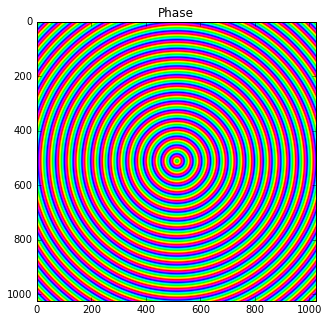

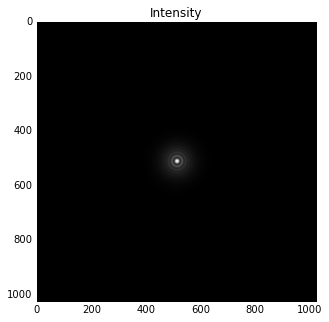

In [3]:
light = Light(type='axicon',N=1024)
light.show_phase()
light.propagate(3)
light.show_intensity()

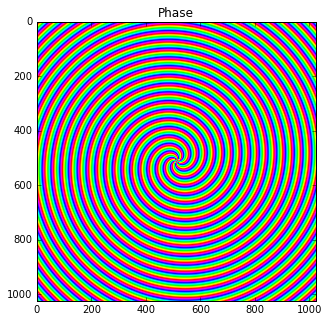

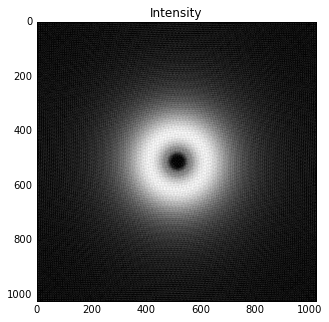

In [58]:
light = Light(type='spiralaxicon')
light.show_phase()
light.propagate(z=20)
light.show_intensity()

## Axicon propagation

Without a lens, the axicon should show a bessel beam in the near field. Let's plot the phase right after the axicon:

In [21]:
light = Light(type='axicon',N=1024)
zprofile = light.show_zplot_nolens(zlim=50, npoints = 20)

Plot the propagated z-profile as an image:

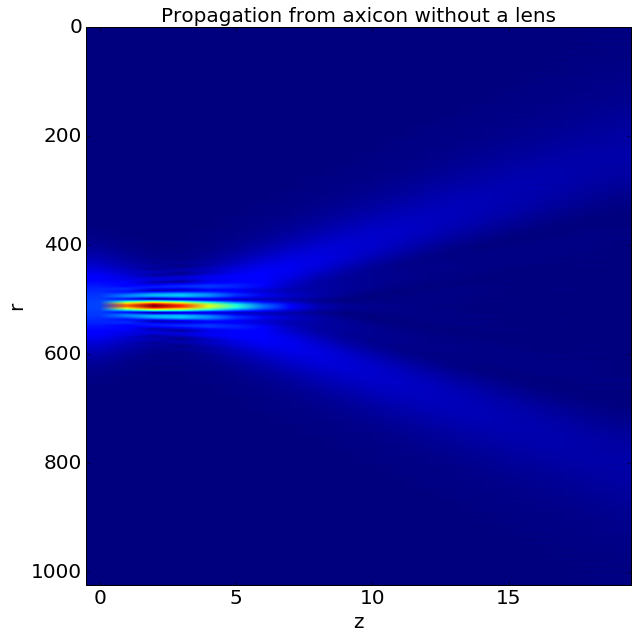

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(zprofile.transpose(), aspect=0.02)

plt.xlabel('z')
plt.ylabel('r')
plt.title('Propagation from axicon without a lens')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()
fig.savefig('nolens.png')

With a lens, the image should show a ring at some point:

In [5]:
light = Light(type='axicon',N=512)
zprofile = light.show_zplot(zlim=1, npoints = 60)

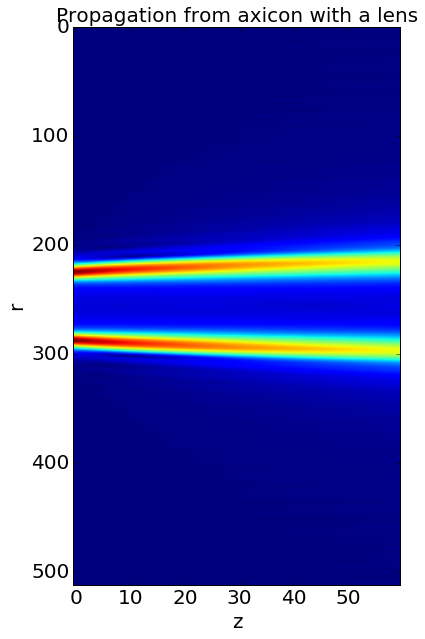

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(zprofile.transpose(), aspect=0.2)

plt.xlabel('z')
plt.ylabel('r')
plt.title('Propagation from axicon with a lens')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()
fig.savefig('withlens.png')

We can stitch together the two parts from the focus by reversing the phase gradient

In [125]:
light = Light(type='axiconrev',N=512)
zprofilerev = light.show_zplot(zlim=.2, npoints = 12)

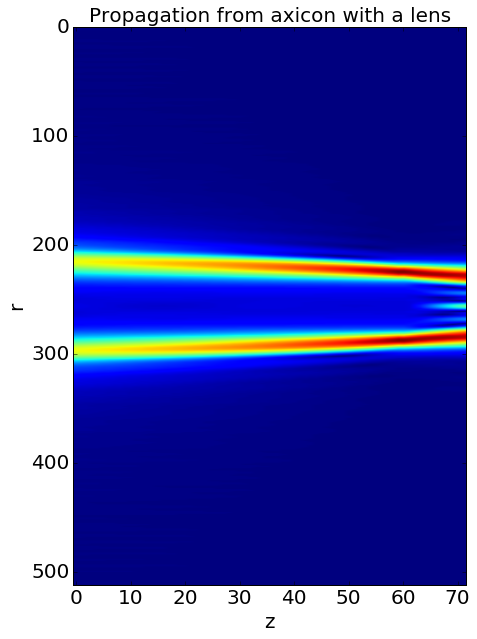

In [126]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(np.hstack(([np.fliplr(zprofile.transpose()),zprofilerev.transpose()])), aspect=0.2)

plt.xlabel('z')
plt.ylabel('r')
plt.title('Propagation from axicon with a lens')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()
fig.savefig('withlens.png')

### Tests with spiral axicons

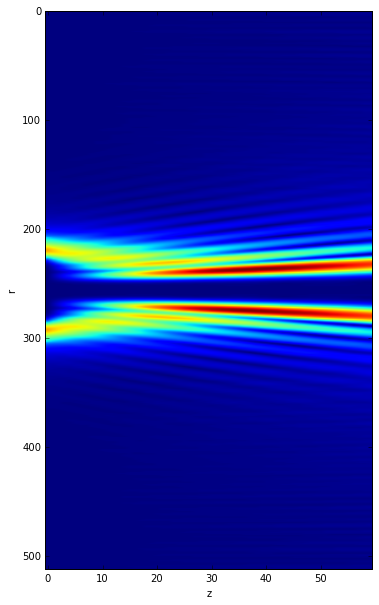

In [62]:
light = Light(type='spiralaxicon',N=512)
zprofileplg = light.show_zplot(zlim=3, npoints = 60)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(zprofileplg.transpose(), aspect=0.2)

plt.xlabel('z')
plt.ylabel('r')
plt.show()

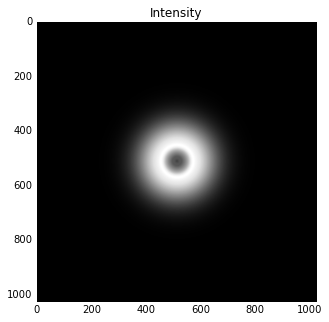

In [122]:
light = Light(type='axicon',N=1024)
light.propagate_after_lens_2(0)
light.show_intensity()

### Set up mask

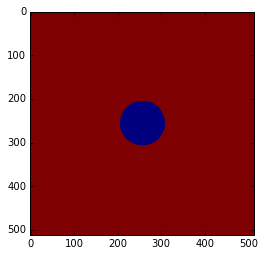

In [26]:
test = 2-light.R
test[test>0]=0
test[test<0]=1
# plt.imshow((5-light.R).clip(min=0))
plt.imshow(test)
plt.show()

In [27]:
light.Uz=test*light.Uz

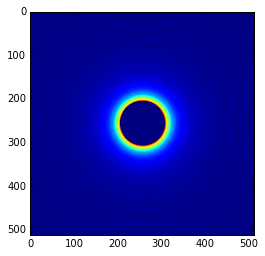

In [29]:
plt.imshow(np.abs(light.Uz))